커널 서포트 벡터 머신

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.datasets import make_blobs

Text(0,0.5,'Feature 1')

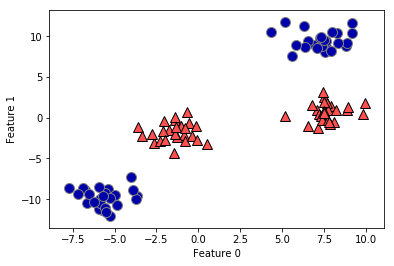

In [2]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [3]:
print(X)

[[ -1.722  -1.48 ]
 [ -3.657  -9.548]
 [  7.078   0.995]
 [ -1.366  -0.315]
 [ -2.665  -3.126]
 [  7.63    8.698]
 [ -5.271 -12.119]
 [  7.918   1.415]
 [ -1.413   0.113]
 [ -1.015  -1.033]
 [  8.263  10.347]
 [  6.968   8.962]
 [ -0.848  -2.122]
 [  7.48    2.494]
 [  7.715   1.842]
 [ -7.741  -8.618]
 [ -5.411  -8.719]
 [ -2.276  -2.897]
 [ -1.257  -2.334]
 [  7.612   9.446]
 [  8.815   8.764]
 [  7.19    0.431]
 [  7.403   9.162]
 [  5.172  11.781]
 [ -2.105  -1.578]
 [  6.534   9.455]
 [  7.596   8.02 ]
 [ -0.656   0.69 ]
 [ -4.861 -10.774]
 [  8.909   0.978]
 [  8.098  -0.584]
 [ -0.798  -2.886]
 [  9.929   1.767]
 [ -1.361  -2.027]
 [  5.599   7.592]
 [ -4.985  -9.517]
 [ -0.571  -0.606]
 [  6.285  11.287]
 [  7.468   3.103]
 [ -5.547  -9.272]
 [  7.719   0.992]
 [ -0.359  -2.202]
 [ -3.713  -9.995]
 [ -5.734 -11.329]
 [  7.294   9.795]
 [ -5.917 -11.162]
 [  8.238   0.924]
 [  8.911   9.149]
 [  7.312   0.148]
 [  7.5     1.948]
 [  7.157  -1.269]
 [ -5.246  -9.818]
 [  7.406   

Text(0,0.5,'Feature 1')

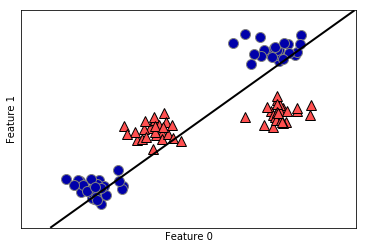

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [5]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
print("X - Data shape: {}".format(X.shape))
print(X[0])
print(X[1])
print(X[2])
print()

print("X_new - Data shape: {}".format(X_new.shape))
print(X_new[0])
print(X_new[1])
print(X_new[2])

X - Data shape: (100, 2)
[-1.722 -1.48 ]
[-3.657 -9.548]
[7.078 0.995]

X_new - Data shape: (100, 3)
[-1.722 -1.48   2.191]
[-3.657 -9.548 91.169]
[7.078 0.995 0.99 ]


Text(0.5,0,'feature1 ** 2')

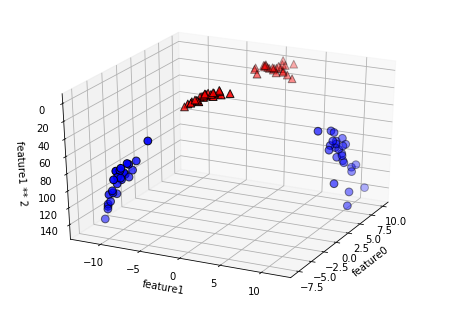

In [6]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
print("coef shape:", coef.shape)
print(coef)
print("intercept shape:", intercept.shape)
print(intercept)

coef shape: (3,)
[ 0.115 -0.192 -0.057]
intercept shape: (1,)
[1.152]


In [8]:
# show linear decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
print("xx shape:", xx.shape)
print("yy shape:", xx.shape)
print(xx[0], xx[1], "...", xx[-1])
print(yy[0], yy[1], "...", yy[-1])

print()

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
print("XX shape:", XX.shape)
print("YY shape:", YY.shape)
print("ZZ shape:", ZZ.shape)
print(XX[0])
print(XX[1])
print(XX[-1])

print(YY[0])
print(YY[1])
print(YY[-1])

xx shape: (50,)
yy shape: (50,)
-9.740646580804565 -9.29840934401878 ... 11.928978021698963
-14.118806977213685 -13.549430354010138 ... 13.78064755976018

XX shape: (50, 50)
YY shape: (50, 50)
ZZ shape: (50, 50)
[-9.741 -9.298 -8.856 -8.414 -7.972 -7.529 -7.087 -6.645 -6.203 -5.761
 -5.318 -4.876 -4.434 -3.992 -3.549 -3.107 -2.665 -2.223 -1.78  -1.338
 -0.896 -0.454 -0.011  0.431  0.873  1.315  1.758  2.2    2.642  3.084
  3.526  3.969  4.411  4.853  5.295  5.738  6.18   6.622  7.064  7.507
  7.949  8.391  8.833  9.276  9.718 10.16  10.602 11.045 11.487 11.929]
[-9.741 -9.298 -8.856 -8.414 -7.972 -7.529 -7.087 -6.645 -6.203 -5.761
 -5.318 -4.876 -4.434 -3.992 -3.549 -3.107 -2.665 -2.223 -1.78  -1.338
 -0.896 -0.454 -0.011  0.431  0.873  1.315  1.758  2.2    2.642  3.084
  3.526  3.969  4.411  4.853  5.295  5.738  6.18   6.622  7.064  7.507
  7.949  8.391  8.833  9.276  9.718 10.16  10.602 11.045 11.487 11.929]
[-9.741 -9.298 -8.856 -8.414 -7.972 -7.529 -7.087 -6.645 -6.203 -5.761
 -5.3

Text(0.5,0,'feature1 ** 2')

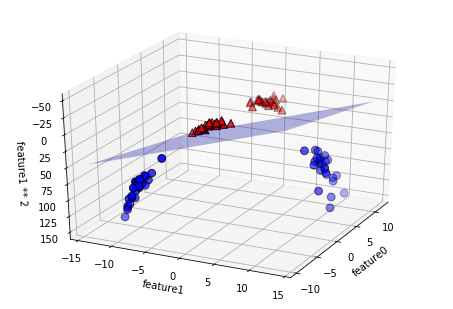

In [9]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [10]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
type(np.c_)

numpy.lib.index_tricks.CClass

In [11]:
print(XX.ravel()[0], XX.ravel()[1], "...", XX.ravel()[-1])
print(YY.ravel()[0], YY.ravel()[1], "...", YY.ravel()[-1])
print(ZZ.ravel()[0], ZZ.ravel()[1], "...", ZZ.ravel()[-1])

print()

c = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
print(c.shape)
print(c[0])
print(c[1])
print(c[-1])

-9.740646580804565 -9.29840934401878 ... 11.928978021698963
-14.118806977213685 -14.118806977213685 ... 13.78064755976018
48.36450444193951 49.26112327259528 ... -2.119923239706811

(2500, 3)
[ -9.741 -14.119  48.365]
[ -9.298 -14.119  49.261]
[11.929 13.781 -2.12 ]


Text(0,0.5,'Feature 1')

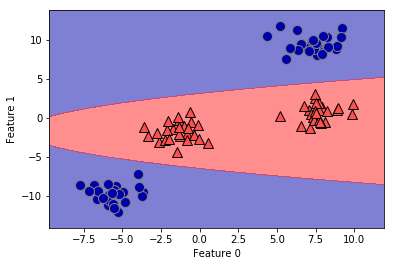

In [12]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

커널 기법

    - 실제의 데이터 특성을 확장하지 않음
    - 확장된 특성에 대한 데이터들의 거리를 계산함

SVM

[[ 8.106  4.287]
 [ 9.502  1.938]
 [11.564  1.339]
 [10.24   2.455]
 [ 7.998  4.853]]
[[-10.     -6.252  -3.734  10.      9.986]]


Text(0,0.5,'Feature 1')

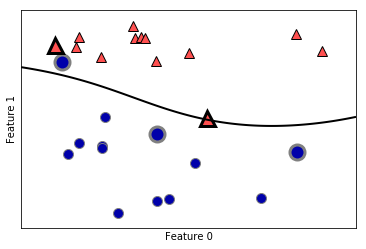

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
dual_coef = svm.dual_coef_
print(sv)
print(dual_coef)
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = dual_coef.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

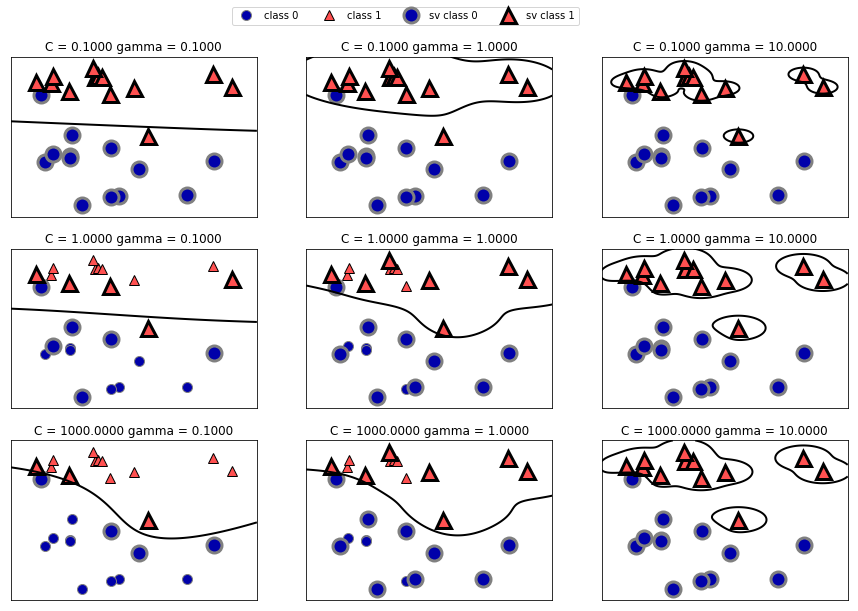

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0,0.5,'Feature magnitude')

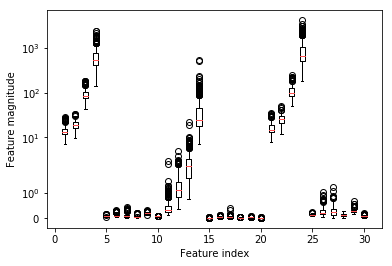

In [17]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [18]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [20]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [21]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


SVM 장단점
    - 장점
        - 다양한 데이터집합에 대해서도 잘 작동함
    - 단점
        - 샘플 데이터 개수가 너무 많으면 성능이 떨어짐
        - 데이터 전처리와 매개변수 설정을 잘해야함